# Joshua Milliken

## Best Inequality Statistic for Corruption Perception Predictions

Looking at many inequality indicators and finding which has the highest correlation with the Corruption Perception Index (CPI).

In [1]:
import pandas as pd
import datapackage
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from project_functions1 import load_and_process, scatter_plot1, sp50, cpi_timeseries, cpi_year

## Exploritory Analysis

In [2]:
CID = load_and_process()

In [3]:
print("Number of rows and columns:", CID.shape)
print(f"Number of Countries: {CID['country'].nunique()}")

Number of rows and columns: (7344, 7)
Number of Countries: 24


In [4]:
CID.head()

,country,variable,percentile,year,value,age,pop
0,SC,sptinc992j,p90p100,1998,0.5271,992,j
1,MU,sptinc992j,p90p100,1998,0.4578,992,j
2,DZ,sptinc992j,p90p100,1998,0.4193,992,j
3,TN,sptinc992j,p90p100,1998,0.4888,992,j
4,BW,sptinc992j,p90p100,1998,0.6949,992,j


In [5]:
CID.describe()

,country,variable,percentile,year,value,age,pop
count,7344,7344,7344,7344,7344,7344,7344
unique,24,5,6,18,2694,3,3
top,SC,sptinc992j,p0p100,1998,-,992,i
freq,306,1728,5184,408,69,5184,5184


## Correlation between Share of national income and perceptions of inequality
### Top 1%

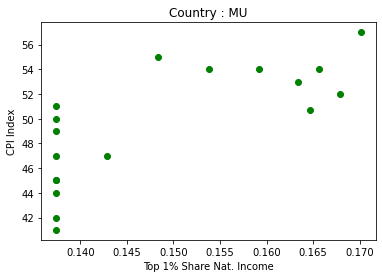

In [6]:
scatter_plot1()

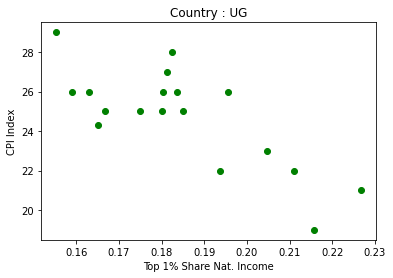

In [7]:
scatter_plot1('UG')

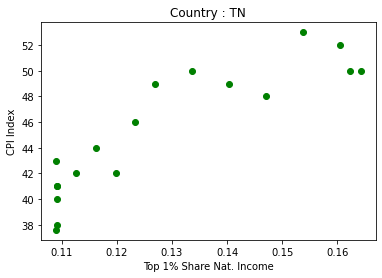

In [8]:
scatter_plot1('TN')

### Bottom 50 %

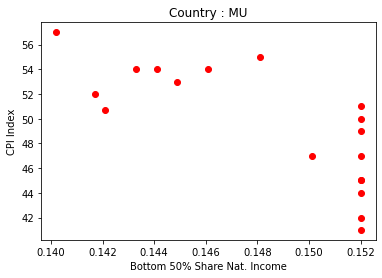

In [9]:
sp50()

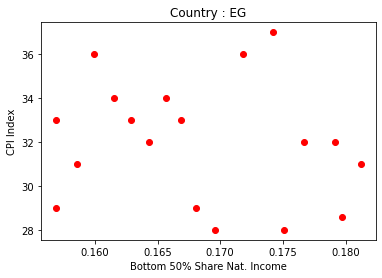

In [10]:
sp50('EG')

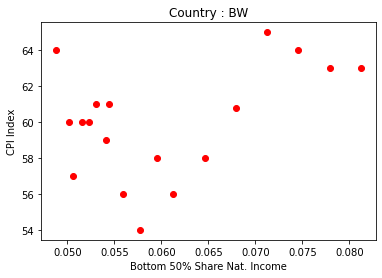

In [11]:
sp50('BW')

In [13]:
'''CPI = CID.loc[CID['variable'] == 'CPI']
sns.set_theme(style = "ticks")
ax = sns.catplot(x='year', y='value', hue = "country", data = CPI, kind = 'bar')
ax.fig.set_size_inches(20,20) '''

## This doesn't work rn, trying to get timeseries with all countries combined

'CPI = CID.loc[CID[\'variable\'] == \'CPI\']\nsns.set_theme(style = "ticks")\nax = sns.catplot(x=\'year\', y=\'value\', hue = "country", data = CPI, kind = \'bar\')\nax.fig.set_size_inches(20,20) '

## Changes in Corruption Pereception Index over time

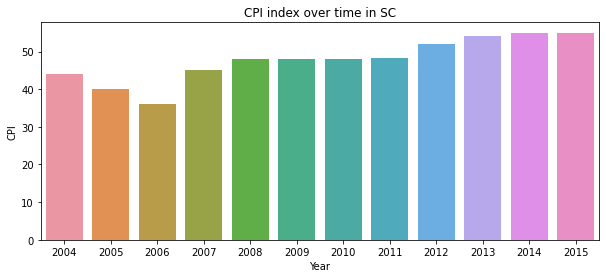

In [14]:
cpi_timeseries()

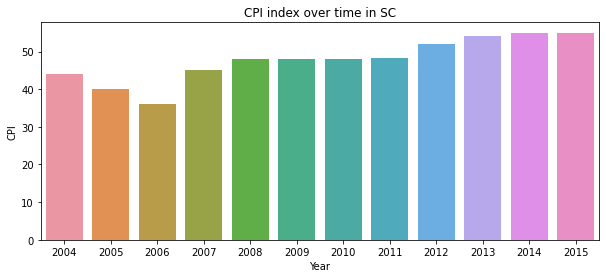

In [18]:
cpi_timeseries('SC')

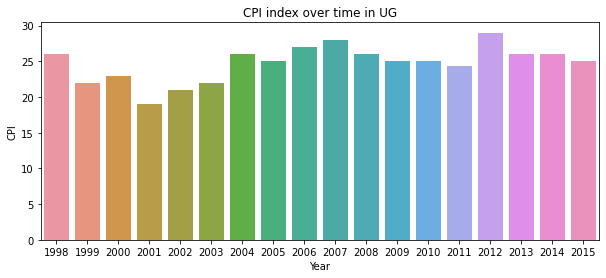

In [19]:
cpi_timeseries('UG')

## Corruption Perception Index in every country in select year

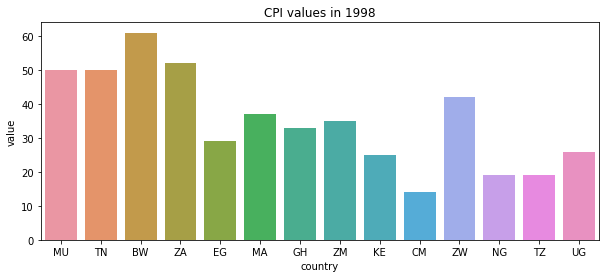

In [15]:
cpi_year(1998)

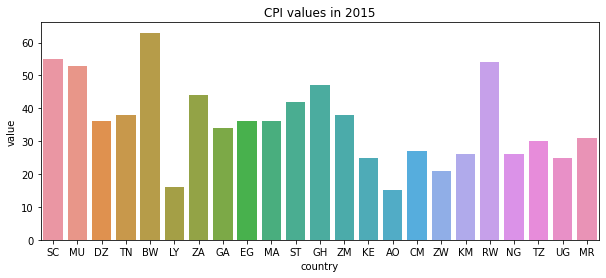

In [20]:
cpi_year()

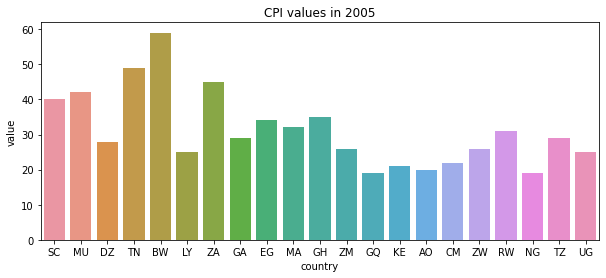

In [21]:
cpi_year(2005)